# Modul 8 - Exploratory Data Analysis (EDA)
Data Fellowship Batch 6
<br>
Pre-training Period


Ade Nur Istiqomah

# 1. Load the data

This part is to load the dataset of English Premier League (EPL) in CSV format.

In [2]:
import pandas as pd
epl_dataset = pd.read_csv(r'C:\Users\Ade Nur H\Documents\IYKRA Data Fellowship\Material\08 EDA\Practice Case\epl_1819.csv')
epl_dataset.head()

,Team,category,general_league_position,finance _live_games_televised,finance _tv_revenue,general_matches_played,general_won,general_draw,general_lost,attack_scored,...,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed,defence_penalty_conceeded,attack_posession,attack_pass_accuracy
0,Manchester City,Champions League,1,26,150986355,38,32,2,4,95,...,58,63,362,518,0,543,295,4,64.0,89.0
1,Liverpool,Champions League,2,29,152425146,38,30,7,1,89,...,76,78,314,610,2,639,317,1,58.8,84.4
2,Chelsea,Champions League Qualification,3,25,146030216,38,21,9,8,63,...,85,73,351,618,2,593,330,2,59.9,87.6
3,Tottenham,Champions League Qualification,4,26,145230801,38,23,2,13,67,...,121,112,326,626,3,770,411,5,56.7,83.2
4,Arsenal,Europa League,5,25,142193180,38,21,7,10,73,...,133,118,412,609,2,762,404,7,56.1,83.3


# 2. The data dictionary

Let's check the column header first.

In [3]:
for col in epl_dataset.columns:
    print(col)

Team
category
general_league_position
finance _live_games_televised
finance _tv_revenue
general_matches_played
general_won
general_draw
general_lost
attack_scored
defence_goals_conceeded
general_goal_difference
general_points
general_squad_size
general_squad_average_age
general_squad_foreigners
finance _team_market
finance _market_average
attack_passes
attack_passes_through
attack_passes_long
attack_passes_back
attack_crosses
attack_corners_taken
attack_shots
attack_shots_on_target
attack_goals_headed
attack_goals_penalty
attack_goals_box
attack_goals_outsidebox
general_card_yellow
general_card_red
attack_goals_counter
attack_goals_freekick
defence_saves
defence_blocks
defence_interceptions
defence_tackles
defence_tackles_last_man
defence_clearances
defence_clearances_headed
defence_penalty_conceeded
attack_posession
attack_pass_accuracy


The data dictionary is taken from https://www.kaggle.com/thesiff/premierleague1819.
1. Team - Denote Champions League Places,Europa League Places and Qualifiers as well as Relegated teams
2. Category : League Position
3. general_league_position : Number of televised games in the UK between Sky Sports and BT Sports
4. finance_live_games_televised : Number of televised games in the UK between Sky Sports and BT Sports
5. finance_tv_revenue : Revenue distributed to each teach from TV contracts
6. general_matches_played : How many matches played
7. general_won : Matches Won
8. general_draw : Matches Drawn
9. general_lost : Matches Lost
10. attack_scored : Goals Scored
11. defence_goals_conceeded : Goals Conceeded
12. general_goal_difference : Goals Scored - Goals Conceeded
13. general_points : 3 points for a win 1 points for a draw 0 points for loss
14. general_squad_size : Number of players registered for the premier league
15. general_squad_average_age : Average age of the squad
16. general_squad_foreigners : Number of Non-UK based players
17. finance _team_market
18. finance _market_average
19. attack_passes
20. attack_passes_through
21. attack_passes_long
22. attack_passes_back
23. attack_crosses
24. attack_corners_taken
25. attack_shots
26. attack_shots_on_target
27. attack_goals_headed
28. attack_goals_penalty
29. attack_goals_box
30. attack_goals_outsidebox
31. general_card_yellow
32. general_card_red
33. attack_goals_counter
34. attack_goals_freekick
35. defence_saves
36. defence_blocks
37. defence_interceptions
38. defence_tackles
39. defence_tackles_last_man
40. defence_clearances
41. defence_clearances_headed
42. defence_penalty_conceeded
43. attack_posession
44. attack_pass_accuracy

# 3. Exploratory Data Analysis

The data is categorized into 4 groups: General, Finance, Attack, and Defence. Each group is broken down into components related to the group, for example Finance group is broken down into:
1. live games televised
2. TV revenue
3. team market
4. market average

## 3.1 Check for duplicity

By taking Team column as identifyer, let's check the duplicity of the dataset.

In [4]:
epl_dataset.duplicated(subset = 'Team')

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
dtype: bool

By setting Team as duplicate identifyer, no duplicated data in this dataset. Same result by setting all column as identifyer.

## 3.2 Check for NaN values

In [5]:
epl_dataset.isnull().values.any()

False

No null values in this dataset.

## 3.3 Data distribution

Drop the Team, Category, and general_league_position columns to create the histogram of all numerical parameters.

In [6]:
data_histogram = epl_dataset.drop(['Team', 'category', 'general_league_position'], axis=1)

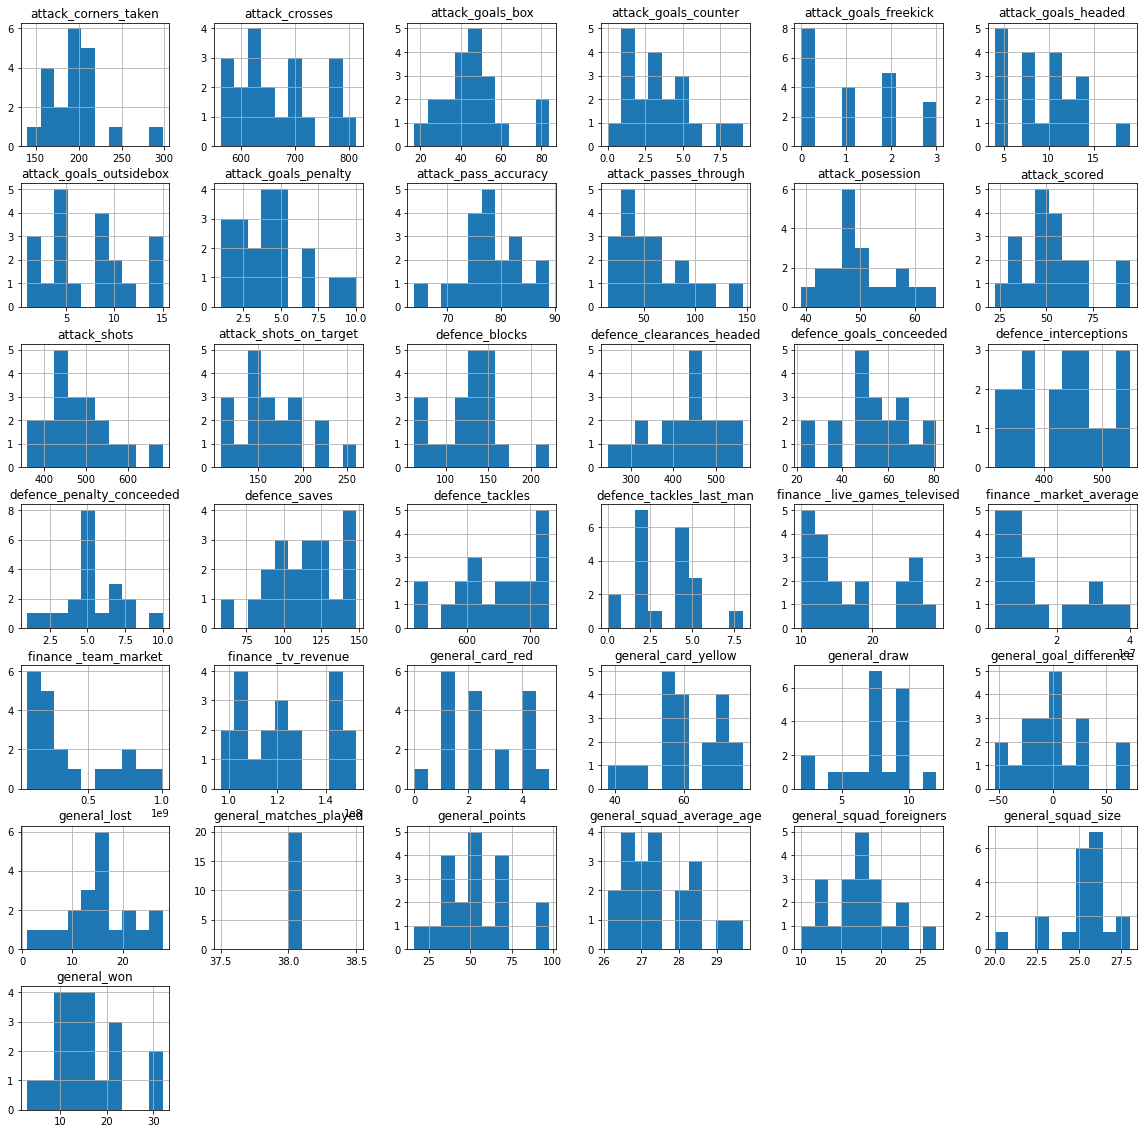

In [12]:
hist = data_histogram.hist(figsize=(20,20), bins = 10)

In [8]:
pd.options.plotting.backend = "plotly"

Seems that the dataset only has one value for general_matches_played, which is 38 for each team.

## 3.4 Outliers inspection

Outliers inspection can be carried out using at least two methods:
1. by looking at its distribution
2. by plotting its boxplot

As the data distribution have been shown before, let's go inspect the team that possess outlier values on their respective variables.

Let's inspect some variables that indicate some outliers based on the variables distributions and boxplot.

### General: Won

In [41]:
fig = epl_dataset.plot.hist(x = 'general_won', title = 'Histogram of General Won', nbins = 10)
fig.show()

Which team have general_won value between 30-34?

In [48]:
epl_dataset.loc[(epl_dataset['general_won'] >= 30) & (epl_dataset['general_won'] <= 34)]

,Team,category,general_league_position,finance _live_games_televised,finance _tv_revenue,general_matches_played,general_won,general_draw,general_lost,attack_scored,...,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed,defence_penalty_conceeded,attack_posession,attack_pass_accuracy
0,Manchester City,Champions League,1,26,150986355,38,32,2,4,95,...,58,63,362,518,0,543,295,4,64.0,89.0
1,Liverpool,Champions League,2,29,152425146,38,30,7,1,89,...,76,78,314,610,2,639,317,1,58.8,84.4


In [27]:
fig_2 = epl_dataset.plot.box(x = 'general_won')
fig_2.show()

Let's calculate the lower and upper bound of general_won variable.

In [49]:
Q1_gw = epl_dataset['general_won'].quantile(0.25)
Q3_gw = epl_dataset['general_won'].quantile(0.75)
IQR_gw = Q3_gw - Q1_gw

lb_gw = Q1_gw - 1.5*IQR_gw
ub_gw = Q3_gw + 1.5*IQR_gw
print("lower bound for general_won " + str(lb_gw))
print("upper bound for general_won " + str(ub_gw))

lower bound for general_won -2.375
upper bound for general_won 32.625


In [44]:
gw_outlier = epl_dataset[epl_dataset['general_won'] > ub_gw]
gw_outlier

,Team,category,general_league_position,finance _live_games_televised,finance _tv_revenue,general_matches_played,general_won,general_draw,general_lost,attack_scored,...,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed,defence_penalty_conceeded,attack_posession,attack_pass_accuracy


From this inspection, there are no outlier in this dataset, from winning match perspective.

### Finance: Team Market

In [35]:
fig_3 = epl_dataset.plot.hist(x = 'finance _team_market', title = 'Histogram of Finance: Team Market', nbins = 10)
fig_3.show()

In [36]:
fig_3 = epl_dataset.plot.box(x = 'finance _team_market')
fig_3.show()

In [45]:
Q1_tm = epl_dataset['finance _team_market'].quantile(0.25)
Q3_tm = epl_dataset['finance _team_market'].quantile(0.75)
IQR_tm = Q3_tm - Q1_tm

lb_tm = Q1_tm - 1.5*IQR_tm
ub_tm = Q3_tm + 1.5*IQR_tm
print("lower bound for finance: team market " + str(lb_tm))
print("upper bound for finance: team market " + str(ub_tm))

lower bound for finance: team market -451550000.0
upper bound for finance: team market 1212178000.0


In [47]:
tm_outlier = epl_dataset[epl_dataset['finance _team_market'] > ub_tm]
tm_outlier

,Team,category,general_league_position,finance _live_games_televised,finance _tv_revenue,general_matches_played,general_won,general_draw,general_lost,attack_scored,...,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed,defence_penalty_conceeded,attack_posession,attack_pass_accuracy


Based on histogram and upper bound calculation, there are no outlier data in this dataset.

## 3.5 Data types

In [15]:
epl_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Team                           20 non-null     object 
 1   category                       20 non-null     object 
 2   general_league_position        20 non-null     int64  
 3   finance _live_games_televised  20 non-null     int64  
 4   finance _tv_revenue            20 non-null     int64  
 5   general_matches_played         20 non-null     int64  
 6   general_won                    20 non-null     int64  
 7   general_draw                   20 non-null     int64  
 8   general_lost                   20 non-null     int64  
 9   attack_scored                  20 non-null     int64  
 10  defence_goals_conceeded        20 non-null     int64  
 11  general_goal_difference        20 non-null     int64  
 12  general_points                 20 non-null     int64

# 4. Problem Set

## No 1. Is this data clean?

Based on data pre-processing and exploratory data analysis, this data is clean.

## No 2. How is the point distribution of the EPL team? and which team is an anomaly?

Please refer to Section 3. Exploratory Data Analysis.

## No 3. Which team has the best attack?

To answer this question, we have to collect all variables that define the team's attack skill. The variables are: attack_scored, attack_passes, attac_passes_through, attack_passes_long, attack_passes_back, attack_crosses, attack_corners_taken, attack_shots, attack_shots_on_target, attack_goals_headed, attack_goals_penalty, attack_goals_box, attack_goals_outsidebox, attack_goals_counter, attack_goals_freekick, attack_possession, attack_pass_accuracy. 

In [63]:
#Create attack dataset
attack = epl_dataset[['Team','attack_scored', 'attack_passes', 'attack_passes_through', 'attack_passes_long', 'attack_passes_back', 'attack_crosses', 'attack_corners_taken', 'attack_shots', 'attack_shots_on_target', 'attack_goals_headed', 'attack_goals_penalty', 'attack_goals_box', 'attack_goals_outsidebox', 'attack_goals_counter', 'attack_goals_freekick', 'attack_posession', 'attack_pass_accuracy']]

In [66]:
attack.sort_values(by = 'attack_scored', ascending = False)

,Team,attack_scored,attack_passes,attack_passes_through,attack_passes_long,attack_passes_back,attack_crosses,attack_corners_taken,attack_shots,attack_shots_on_target,attack_goals_headed,attack_goals_penalty,attack_goals_box,attack_goals_outsidebox,attack_goals_counter,attack_goals_freekick,attack_posession,attack_pass_accuracy
0,Manchester City,95,"26,581",112,"1,814","4,240",783,298,683,260,12,3,80,15,5,2,64.0,89.0
1,Liverpool,89,"23,638",98,"2,250","3,416",721,249,575,226,19,7,84,5,6,1,58.8,84.4
4,Arsenal,73,"20,805",65,"2,062","3,102",605,209,467,170,5,4,62,11,3,3,56.1,83.3
3,Tottenham,67,"21,295",87,"2,267","3,191",643,194,537,189,14,4,53,14,5,2,56.7,83.2
5,Manchester United,65,"19,202",63,"2,242","2,634",638,200,526,225,4,9,55,10,4,2,53.3,82.3
2,Chelsea,63,"25,070",146,"1,774","3,874",692,215,607,198,8,5,54,9,1,1,59.9,87.6
13,Bournemouth,56,"15,943",57,"1,932","2,249",613,191,446,163,11,7,50,6,9,0,47.7,78.1
7,Everton,54,"16,494",44,"2,310","2,362",814,215,498,169,13,2,45,10,3,0,51.0,77.3
9,West Ham,52,"16,358",75,"2,315","2,273",630,188,441,157,10,5,47,5,3,0,49.0,78.7
10,Watford,52,"15,462",32,"2,437","2,314",570,177,437,152,8,1,44,8,3,0,47.4,76.1


Solely based on attack_scored, the team that possess the best attack is **Manchester City**. Ideally, each variables other that attack_scored should be taken into account in determining which team that has the best attack.

## No 4. Which team has the best defense?  

Let's first create defense dataset that only includes variables that define defense skill: defence_goals_conceeded, defence_saves, defence_blocks, defence_interceptions, defence_tackles, defence_tackles_last_man, defence_clearances, defence_clearances_headed, and defence_penalty_conceeded.     

In [69]:
defense = epl_dataset[['Team','defence_goals_conceeded', 'defence_saves', 'defence_blocks', 'defence_interceptions', 'defence_tackles', 'defence_tackles_last_man', 'defence_clearances', 'defence_clearances_headed', 'defence_penalty_conceeded']]

In [72]:
defense.sort_values(by = 'defence_goals_conceeded', ascending = True)

,Team,defence_goals_conceeded,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed,defence_penalty_conceeded
1,Liverpool,22,76,78,314,610,2,639,317,1
0,Manchester City,23,58,63,362,518,0,543,295,4
2,Chelsea,39,85,73,351,618,2,593,330,2
3,Tottenham,39,121,112,326,626,3,770,411,5
6,Wolverhampton,46,100,148,501,720,2,824,464,4
7,Everton,46,94,85,456,700,4,825,430,5
8,Leicester,48,90,96,436,676,4,945,500,5
12,Newcastle,48,95,134,506,714,4,"1,120",564,7
4,Arsenal,51,133,118,412,609,2,762,404,7
11,Crystal Palace,53,113,141,446,730,2,940,467,5


Solely based on defence_goals_conceeded, the team that possess the best defense is **Liverpool**. Ideally, each variables other than defence_goals_conceeded should be taken into account in determining which team that has the best defense. The best defense team should have minimum goal conceeded value.

## No 5. Which team is good in the financial aspect?

Let's first create finance dataset that only includes variables that define team's finance situation: finance _live_games_televised, finance _tv_revenue, finance _team_market, and finance _market_average.

In [76]:
finance = epl_dataset[['Team','finance _live_games_televised', 'finance _tv_revenue', 'finance _team_market', 'finance _market_average']]

In [77]:
finance

,Team,finance _live_games_televised,finance _tv_revenue,finance _team_market,finance _market_average
0,Manchester City,26,150986355,1003200000,39987200
1,Liverpool,29,152425146,836440000,34848000
2,Chelsea,25,146030216,779460000,29981600
3,Tottenham,26,145230801,735240000,29409600
4,Arsenal,25,142193180,701800000,26989600
5,Manchester United,27,142512868,550440000,22017600
6,Wolverhampton,15,127165114,369600000,16068800
7,Everton,18,128603905,305360000,11748000
8,Leicester,15,123328078,284240000,10929600
9,West Ham,16,122528663,234212000,9011200


In [80]:
finance.sort_values(by = 'finance _team_market', ascending = False)

,Team,finance _live_games_televised,finance _tv_revenue,finance _team_market,finance _market_average
0,Manchester City,26,150986355,1003200000,39987200
1,Liverpool,29,152425146,836440000,34848000
2,Chelsea,25,146030216,779460000,29981600
3,Tottenham,26,145230801,735240000,29409600
4,Arsenal,25,142193180,701800000,26989600
5,Manchester United,27,142512868,550440000,22017600
6,Wolverhampton,15,127165114,369600000,16068800
7,Everton,18,128603905,305360000,11748000
8,Leicester,15,123328078,284240000,10929600
9,West Ham,16,122528663,234212000,9011200


Solely based on finance _team_market, the team that is doing the best financially  is **Manchester City**. Ideally, each variables other than defence_goals_conceeded should be taken into account in determining which team that doing good financially. From this quick look, the maximum team market coincides with maximum team market average.